In [1]:
import pandas as pd
import numpy as np

In [2]:
coins=["BTC","ETH","BNB","SOL","ADA","XRP","LUNA1","AVAX","DOT","DOGE","SHIB","UNI1","LTC","LINK","BCH"]
shares=[51.57*100,25.79*100,5.03*100,3.10*100,2.58*100,2.33*100,1.82*100,1.57*100,1.55*100,1.33*100,1.08*100,0.63*100,0.60*100,0.54*100,0.48*100]

In [3]:
Df=pd.DataFrame()
len(Df)

0

In [4]:
import time
import datetime

In [5]:
for coin in coins:
  p=int(time.mktime(datetime.datetime(2021,4,18,23,59).timetuple()))
  p2=int(time.mktime(datetime.date.today().timetuple()))
  c=coin+"-USD"
  url=f"https://query1.finance.yahoo.com/v7/finance/download/{c}?period1={p}&period2={p2}&interval=1d&events=history&includeAdjustedClose=true"
  df=pd.read_csv(url)
  df=df[['Date','Close']]
  df.rename(columns = {'Close':coin},inplace = True)
  if(len(Df)==0):
    Df=df
  else:
    Df=pd.merge(Df, df, on='Date',how="left")
Df

Date           BTC          ETH         BNB        SOL       ADA  \
0    2021-04-18  56216.183594  2237.136963  481.034241  32.302917  1.275501   
1    2021-04-19  55724.265625  2166.188721  505.092926  31.675896  1.197959   
2    2021-04-20  56473.031250  2330.210938  587.029114  31.770054  1.265934   
3    2021-04-21  53906.089844  2364.751709  546.023560  32.513042  1.206735   
4    2021-04-22  51762.273438  2403.535156  506.013000  38.879761  1.147017   
..          ...           ...          ...         ...        ...       ...   
382  2022-05-05  36575.140625  2749.213135  378.773621  84.596024  0.791152   
383  2022-05-06  36040.921875  2694.979736  379.304291  81.764107  0.783359   
384  2022-05-07  35501.953125  2636.093018  365.684113  78.983421  0.761882   
385  2022-05-08  34059.265625  2517.459961  355.398743  75.220184  0.739563   
386  2022-05-09  32323.986328  2376.539795  324.351654  69.870377  0.658415   

          XRP      LUNA1       AVAX        DOT      DOGE      SHIB       UNI1  \
0    1.405998  13.398309  29.253094  37.347431  0.320475  0.000002  31.746319   
1    1.315044  13.906250  26.283066  34.816669  0.407318  0.000004  31.446096   
2    1.383299  13.432103  27.347954  35.444435  0.319500  0.000002  31.963188   
3    1.296498  13.281159  25.903503  33.871029  0.306925  0.000001  33.603989   
4    1.159682  13.649862  24.034962  32.988476  0.260967  0.000002  34.131321   
..        ...        ...        ...        ...       ...       ...        ...   
382  0.598886  82.580406  59.127441  14.581028  0.128430  0.000020   7.333388   
383  0.602570  77.464806  57.034325  14.313102  0.127901  0.000020   7.599332   
384  0.582347  68.249123  55.156693  13.775654  0.127532  0.000019   7.187346   
385  0.566527  64.081123  51.521225  13.254074  0.124207  0.000018   7.120745   
386  0.525384  57.116631  47.236336  11.529966  0.114089  0.000016   6.853822   

            LTC       LINK         BCH  
0    273.098816  39.065910  965.682617  
1    261.919220  35.879383  894.128723  
2    260.941345  38.950634  940.986938  
3    258.805603  36.436359  913.905762  
4    253.078354  35.233406  854.077942  
..          ...        ...         ...  
382   96.918915  10.917400  277.293304  
383   96.791756  10.799844  274.981537  
384   94.570900  10.239905  268.711639  
385   93.976433   9.990030  261.769806  
386   84.821892   9.098307  241.713287  

[387 rows x 16 columns]

In [6]:
Df.fillna(method='ffill', inplace=True)
Df.fillna(method='bfill', inplace=True)
Df['SHIB']=Df['SHIB'].replace(0,1.0e-6)

In [7]:
Df.describe()

BTC          ETH         BNB         SOL         ADA  \
count    387.000000   387.000000  387.000000  387.000000  387.000000   
mean   45238.863327  3151.896939  438.146035  107.633443    1.517313   
std     8571.229720   706.796192   96.621202   62.730253    0.534392   
min    29807.347656  1787.510742  261.818085   23.489555    0.658415   
25%    38721.625000  2614.046387  372.171539   42.819595    1.132818   
50%    43569.003906  3077.867920  415.919800   98.658104    1.362030   
75%    49798.363281  3621.907226  504.848465  156.421433    1.953712   
max    67566.828125  4812.087402  675.684082  258.934326    2.968239   

              XRP       LUNA1        AVAX         DOT        DOGE        SHIB  \
count  387.000000  387.000000  387.000000  387.000000  387.000000  387.000000   
mean     0.915627   46.336216   59.325343   26.533920    0.225764    0.000021   
std      0.241418   31.314213   32.702670    9.524553    0.094848    0.000015   
min      0.525384    4.107670    9.650588   10.981212    0.111608    0.000001   
25%      0.747100   16.209604   26.371172   20.252199    0.147322    0.000008   
50%      0.842968   42.956474   65.455284   24.050674    0.207597    0.000022   
75%      1.086939   76.274059   84.435924   33.080433    0.265789    0.000029   
max      1.651025  116.408920  134.531036   53.881733    0.684777    0.000080   

             UNI1         LTC        LINK          BCH  
count  387.000000  387.000000  387.000000   387.000000  
mean    19.876639  162.736098   23.181010   531.452959  
std      8.428523   53.816750    8.037415   220.666374  
min      6.771395   84.821892    9.098307   241.713287  
25%     11.446792  124.517937   16.732746   364.187347  
50%     19.671728  151.667267   23.015078   505.055450  
75%     25.636619  183.679528   27.485371   624.936676  
max     43.164505  386.450775   52.198696  1542.425049

In [8]:
for i in reversed(range(1,len(Df))):
  for coin in coins:
    Df[coin][i]=(Df[coin][i]-Df[coin][i-1])*100/Df[coin][i-1]
Df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date           BTC          ETH         BNB        SOL        ADA  \
0    2021-04-18  56216.183594  2237.136963  481.034241  32.302917   1.275501   
1    2021-04-19     -0.875047    -3.171386    5.001450  -1.941066  -6.079337   
2    2021-04-20      1.343698     7.571926   16.222003   0.297254   5.674234   
3    2021-04-21     -4.545429     1.482302   -6.985268   2.338643  -4.676310   
4    2021-04-22     -3.976947     1.640064   -7.327625  19.582046  -4.948725   
..          ...           ...          ...         ...        ...        ...   
382  2022-05-05     -7.867402    -6.509853   -5.895373  -8.811849 -11.794520   
383  2022-05-06     -1.460606    -1.972688    0.140102  -3.347577  -0.985019   
384  2022-05-07     -1.495436    -2.185052   -3.590832  -3.400864  -2.741655   
385  2022-05-08     -4.063685    -4.500337   -2.812638  -4.764591  -2.929456   
386  2022-05-09     -5.094882    -5.597712   -8.735847  -7.112196 -10.972426   

           XRP      LUNA1       AVAX        DOT       DOGE        SHIB  \
0     1.405998  13.398309  29.253094  37.347431   0.320475    0.000002   
1    -6.468999   3.791083 -10.152868  -6.776268  27.098214  100.000000   
2     5.190321  -3.409596   4.051613   1.803062 -21.560059  -50.000000   
3    -6.274927  -1.123756  -5.281752  -4.439078  -3.935837  -50.000000   
4   -10.552735   2.776136  -7.213468  -2.605628 -14.973691  100.000000   
..         ...        ...        ...        ...        ...         ...   
382  -7.361162  -4.168230 -11.863357 -10.574687  -5.433366   -9.090909   
383   0.615142  -6.194690  -3.540008  -1.837497  -0.411898    0.000000   
384  -3.356125 -11.896606  -3.292109  -3.754937  -0.288504   -5.000000   
385  -2.716593  -6.107038  -6.591164  -3.786245  -2.607189   -5.263158   
386  -7.262319 -10.868243  -8.316745 -13.008136  -8.146079  -11.111111   

          UNI1         LTC       LINK         BCH  
0    31.746319  273.098816  39.065910  965.682617  
1    -0.945694   -4.093608  -8.156797   -7.409670  
2     1.644376   -0.373350   8.559933    5.240656  
3     5.133408   -0.818476  -6.455030   -2.877955  
4     1.569254   -2.212954  -3.301518   -6.546388  
..         ...         ...        ...         ...  
382  -7.841155   -8.803539 -10.112378   -7.524554  
383   3.626482   -0.131201  -1.076777   -0.833690  
384  -5.421345   -2.294468  -5.184695   -2.280116  
385  -0.926642   -0.628594  -2.440208   -2.583376  
386  -3.748526   -9.741316  -8.926129   -7.661892  

[387 rows x 16 columns]

In [9]:
ic15=[sum(shares)]
for i in range(1,len(Df)):
  d=((Df[coins]).iloc[[i]])
  d=d.values.tolist()[0]
  c=[]
  for i in range(len(d)):
    c.append(shares[i]+(shares[i]*d[i]/100))
  shares=c
  ic15.append(sum(c))
Df['IC15']=ic15

In [10]:
Df.describe()

BTC          ETH         BNB         SOL         ADA  \
count    387.000000   387.000000  387.000000  387.000000  387.000000   
mean     145.191113     5.921166    1.280563    0.539186   -0.002051   
std     2857.635334   113.821824   25.002014    7.329486    5.787060   
min      -13.766123   -27.200349  -33.265631  -37.208767  -26.009427   
25%       -2.225298    -2.421055   -2.491535   -3.525221   -3.311482   
50%       -0.069651     0.297546    0.126812    0.102039   -0.205085   
75%        2.033788     2.891695    2.788481    3.890623    2.628803   
max    56216.183594  2237.136963  481.034241   32.302917   24.529826   

              XRP       LUNA1        AVAX         DOT        DOGE        SHIB  \
count  387.000000  387.000000  387.000000  387.000000  387.000000  387.000000   
mean    -0.072415    0.783376    0.488791    0.014618   -0.013107    2.220154   
std      5.962895    8.776370    7.749640    6.828996    7.103270   26.898755   
min    -32.715778  -38.589875  -36.495044  -37.933518  -36.386258  -50.000000   
25%     -2.936763   -4.308453   -4.100638   -3.184244   -3.286285   -4.000000   
50%     -0.280300    0.385982    0.335511    0.000000   -0.292303    0.000000   
75%      2.553920    5.296878    4.487127    3.000025    2.302208    2.704678   
max     32.574284   60.451911   29.253094   37.347431   27.245599  433.333333   

             UNI1         LTC        LINK         BCH          IC15  
count  387.000000  387.000000  387.000000  387.000000    387.000000  
mean    -0.104140    0.560989   -0.052961    2.313488  12156.322491  
std      6.685464   14.941062    6.886278   49.464203   3184.949942  
min    -33.200449  -35.672864  -37.238777  -35.248433   6262.196484  
25%     -3.833888   -2.955168   -3.669554   -2.893543  10210.750205  
50%     -0.042866   -0.071230    0.191290   -0.017719  11909.107798  
75%      3.563667    2.892871    3.500080    2.450342  13959.347603  
max     46.276790  273.098816   39.065910  965.682617  20171.965401

In [11]:
Df=Df[['Date','IC15']]
Df

Date          IC15
0    2021-04-18  10000.000000
1    2021-04-19   9974.950236
2    2021-04-20  10209.187581
3    2021-04-21   9873.835111
4    2021-04-22   9727.786995
..          ...           ...
382  2022-05-05  10689.362721
383  2022-05-06  10468.415255
384  2022-05-07  10108.428547
385  2022-05-08   9650.689477
386  2022-05-09   8980.285413

[387 rows x 2 columns]

In [12]:
for i in reversed(range(1,len(Df))):
  Df["IC15"][i]=(Df["IC15"][i]-Df["IC15"][i-1])*100/Df["IC15"][i-1]
Df["IC15"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      10000.000000
1         -0.250498
2          2.348256
3         -3.284811
4         -1.479143
           ...     
382       -7.410858
383       -2.066984
384       -3.438789
385       -4.528291
386       -6.946696
Name: IC15, Length: 387, dtype: float64

In [13]:
Df=Df[1:]
Df

Date      IC15
1    2021-04-19 -0.250498
2    2021-04-20  2.348256
3    2021-04-21 -3.284811
4    2021-04-22 -1.479143
5    2021-04-23 -1.707807
..          ...       ...
382  2022-05-05 -7.410858
383  2022-05-06 -2.066984
384  2022-05-07 -3.438789
385  2022-05-08 -4.528291
386  2022-05-09 -6.946696

[386 rows x 2 columns]

In [14]:
dates=(Df['Date'])[:-8]
data=Df["IC15"][:-8]
d=list()
c=list()
for day in dates:
  d.append(list(map(int,day.split('-'))))
for i in data:
  c.append([float(i)])

In [15]:
from sklearn.svm import SVR
rbf_svr=SVR(C=1000.0,gamma=0.65)
rbf_svr.fit(d,c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.65)

In [16]:
dates=Df["Date"][-8:]
for day in dates:
  d.append(list(map(int,day.split('-'))))

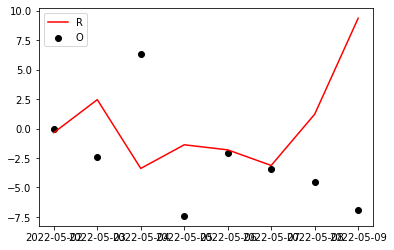

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter((Df['Date'])[-8:],Df['IC15'][-8:],color='black',label='O')
plt.plot((Df['Date'])[-8:],rbf_svr.predict(d)[:8],color='Red',label='R')
plt.legend()
plt.show()

In [18]:
p=((datetime.datetime.now()+ datetime.timedelta(1)).strftime('%Y-%m-%d')).split('-')

In [19]:
p

['2022', '05', '10']

In [20]:
p=rbf_svr.predict([p])
p

array([1.01067838])

In [21]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


# Open our new sheet and add some data.
worksheet = gc.open('output').sheet1


worksheet.update_acell("C2",round(p[0],2))
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1Krw_Crb1TNwh7CVlJtEWzd5-JYrud30wmVwPePl3eg4',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!C2',
 'updatedRows': 1}

In [32]:
s=0
volume=[]
for coin in coins+['HEX','WBTC','MATIC','NEAR','STETH','CRO','DAI','TRX','RUNE','SAND','THETA','FTM','CAKE']:
  s=s+1
  p=int(time.mktime(datetime.datetime(2021,4,18,23,59).timetuple()))
  p2=int(time.mktime(datetime.date.today().timetuple()))
  c=coin+"-USD"
  url=f"https://query1.finance.yahoo.com/v7/finance/download/{c}?period1={p}&period2={p2}&interval=1d&events=history&includeAdjustedClose=true"
  df=pd.read_csv(url)
  volume.append(int(df['Volume'][len(df)-1]))
  v=df['Volume'][len(df)-1]
  df=df[['Date','Close']]
  df.fillna(method='ffill', inplace=True)
  df.fillna(method='bfill', inplace=True)
  if coin=="SHIB":
    df['Close']=df['Close'].replace(0,1.0e-6)
  for i in reversed(range(1,len(df))):
    df["Close"][i]=(df["Close"][i]-df["Close"][i-1])*100/df["Close"][i-1]
  df=df[1:]
  d=list()
  c=list()
  for day in df['Date']:
    d.append(list(map(int,day.split('-'))))
  for i in df['Close']:
    c.append([float(i)])
  rbf_svr=SVR(C=1000.0,gamma=0.65)
  rbf_svr.fit(d,c)
  d=[]
  sdate = datetime.datetime.now()   # start date
  dates=pd.date_range(sdate,sdate+datetime.timedelta(days=365),freq='d')
  for day in dates:
    d1=str(day).split('-')
    d.append(list(map(int,str(day.strftime("%Y-%m-%d")).split('-'))))
  p=rbf_svr.predict(d)
  x=100
  for p1 in p:
    x=x*(1+(p1/100))
  x=(x-100)/100
  gc = gspread.authorize(creds)
  worksheet = gc.open('Crypto')
  worksheet.sheet1.update_acell("A"+str(s),coin)
  worksheet.sheet1.update_acell("B"+str(s),round(x,2))
  if(v>937997760):
    worksheet.sheet1.update_acell("C"+str(s),"MID")
  if(v<=937997760):
    worksheet.sheet1.update_acell("C"+str(s),"HIGH")
  print(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5335056938804625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5575085574177797


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.6643464265845984


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.301045763048196


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8261061516850806


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.7505665106683297


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.094487047569168


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.11900726885727224


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.7550525660793752


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8668257745444063


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8124551199242639


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8772696704047788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8658874002377054


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8446983620632514


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8870166667962858


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.5184230979367832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5356997202003339


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.6638394380988615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.9179138583052544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.577985591368882


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.39240393986239414


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.009486210137850861


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.49287657384666056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5550992200083571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1650074192921827


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8746588610483788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.36629631830154713


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8936149416541087


In [33]:
volume
import statistics
statistics.median(volume)

927617280.0